# Sound celerity maps in the Gulf Stream area, for phd proposal

This is a first exploration.
We focus on a zoom.


In [1]:
# import libraries
%matplotlib inline
from glob import glob
from netCDF4 import Dataset
#import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gsw

from clib.flow import *

In [2]:
# load grid info
grd = grid()

# define the zoom
di=200
zgrd = grd[900:900+di,800:800+di]

# output files
ofiles = sorted(glob(grd._data_dir+'*avg*.nc'))
ofile = ofiles[0]

it = 0
ds = xr.open_dataset(ofile).isel(time=it)
zds = ds.isel(eta_rho=zgrd.ij[0], xi_rho=zgrd.ij[1])

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
-- Generate a subset of the original grid
(slice(900, 1100, None), slice(800, 1000, None))
-- Grid object
dim lon_rho: 200  200
lon_rho min= -66.660, max=-65.187
lat_rho min= 39.140, max=40.273
h min= 1862.888, max=4697.104


---

## Start looking at sound celerity now

In [3]:
# derive surface sound speed
T = ds['temp']
S = ds['salt']
z = ds['temp'].isel(s_rho=-1) * 0.
c = get_soundc(T.isel(s_rho=-1), S.isel(s_rho=-1), z, grd['lon_rho'], grd['lat_rho'])

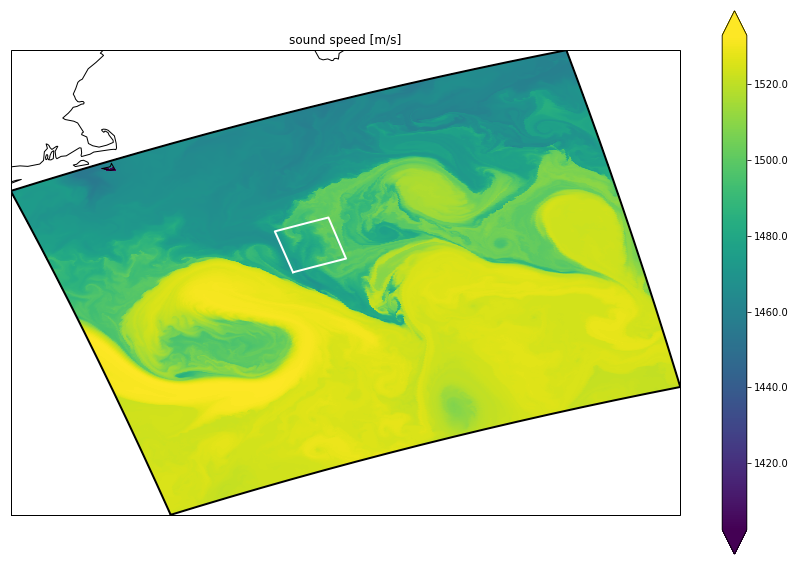

In [4]:
crs = ccrs.PlateCarree()

fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=crs)
ax.set_extent(grd.hextent, crs)
#gl=ax.gridlines(crs=crs,draw_labels=True)
#gl.xlabels_top = False
ax.coastlines(resolution='50m')
#
#it = 0
#iz = -1
#ilon = grd.Lp/2  # used for vertical slices
toplt = c
# should probably mask T
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(grd['lon_rho'],grd['lat_rho'],toplt,
                   vmin=toplt.min(),vmax=toplt.max(), 
                   cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_title('sound speed [m/s]')
#plt.savefig('figs/c_hmap.png',dpi=300)
grd.plot_domain(ax,color='black',lw=2)
zgrd.plot_domain(ax,color='white',lw=2)
#plt.savefig('figs/C_hmap_global.png',dpi=300)

In [5]:
# derive surface sound speed in the subdomain
T = zds['temp']
S = zds['salt']
z = zds['temp'].isel(s_rho=-1) * 0.
c = get_soundc(T.isel(s_rho=-1), S.isel(s_rho=-1), z, grd['lon_rho'], grd['lat_rho'])

Text(0.5,1,'sound speed [m/s]')

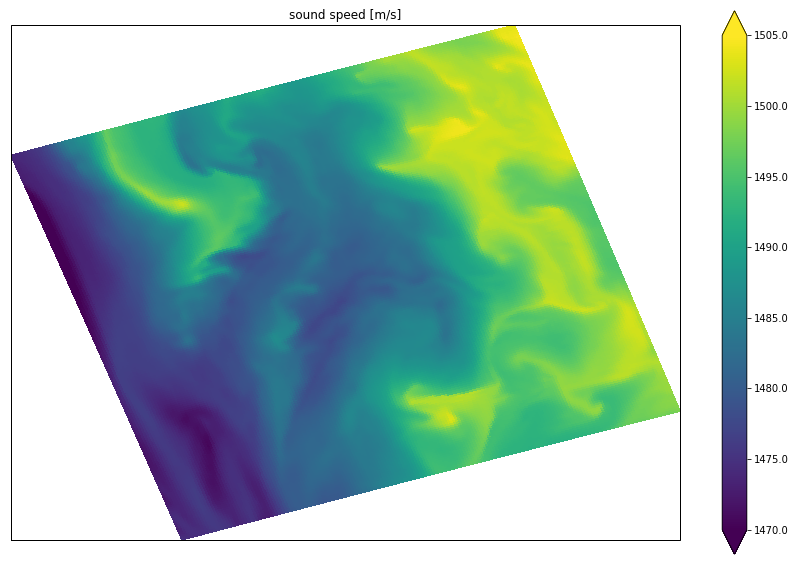

In [6]:
fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(zgrd.hextent, ccrs.PlateCarree())
#gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
#gl.xlabels_top = False
ax.coastlines(resolution='50m')
#

vmin, vmax =toplt.min(), toplt.max()
vmin, vmax = 1470, 1505

toplt = c
# should probably mask T
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(zgrd['lon_rho'],zgrd['lat_rho'],toplt,
                   vmin=vmin,vmax=vmax, 
                   cmap=cmap,)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_title('sound speed [m/s]')

#plt.savefig('figs/c_hmap.png',dpi=300)


In [9]:
lvls

array([1470, 1490])

[]

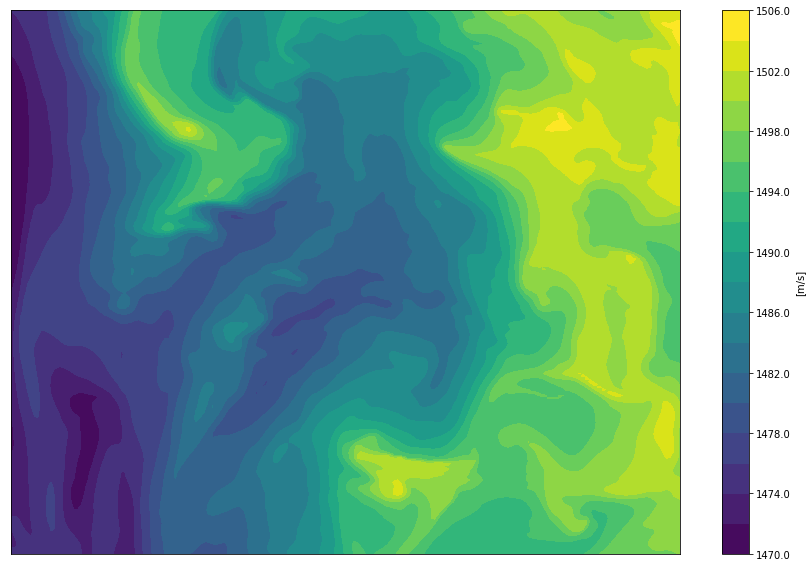

In [16]:
fig=plt.figure(figsize=(15,10))
#
ax=plt.subplot(111)

lvls = np.arange(vmin, vmax+2, 2)

toplt = c
toplt[np.where(toplt>vmax)]=vmax
toplt[np.where(toplt<vmin)]=vmin
#im = ax.pcolormesh(toplt, vmin=vmin,vmax=vmax, cmap=cmap)
im = ax.contourf(toplt, lvls, vmin=vmin,vmax=vmax, cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
cbar.set_label('[m/s]')
#ax.set_title('sound speed [m/s]')
ax.set_xticks(())
ax.set_yticks(())

---

## vertical slices: ilat=0

(-1000.0, 0.0)

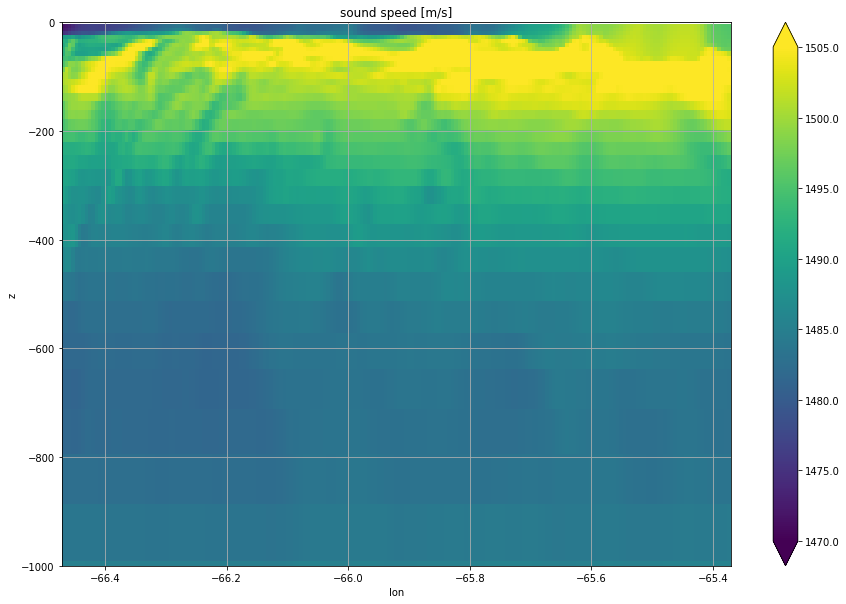

In [21]:
ilon, ilat = 0, 100

lon = zgrd['lon_rho'].isel(eta_rho=ilat)
lat = zgrd['lat_rho'].isel(eta_rho=ilat)
h = zgrd['h'].isel(eta_rho=ilat)
zeta = zds['zeta'].isel(eta_rho=ilat)
z = grd.get_z(zeta, h)

# interpolate on now a horizontally uniform grid
z_uni = z.isel(xi_rho=ilon).values
T_uni = interp2z(z_uni, z.values, T.isel(eta_rho=ilat).values)[:,:,0]
S_uni = interp2z(z_uni, z.values, S.isel(eta_rho=ilat).values)[:,:,0]
c_uni = get_soundc(T_uni, S_uni, z_uni[:,None], lon.values, lat.values)

plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = c_uni
im = ax.pcolormesh(lon,z_uni,toplt,cmap=cmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lon')
ax.set_ylabel('z')
ax.set_title('sound speed [m/s]')
ax.grid(True)
ax.set_ylim([-1000.,0.])

/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


(-1000.0, 0.0)

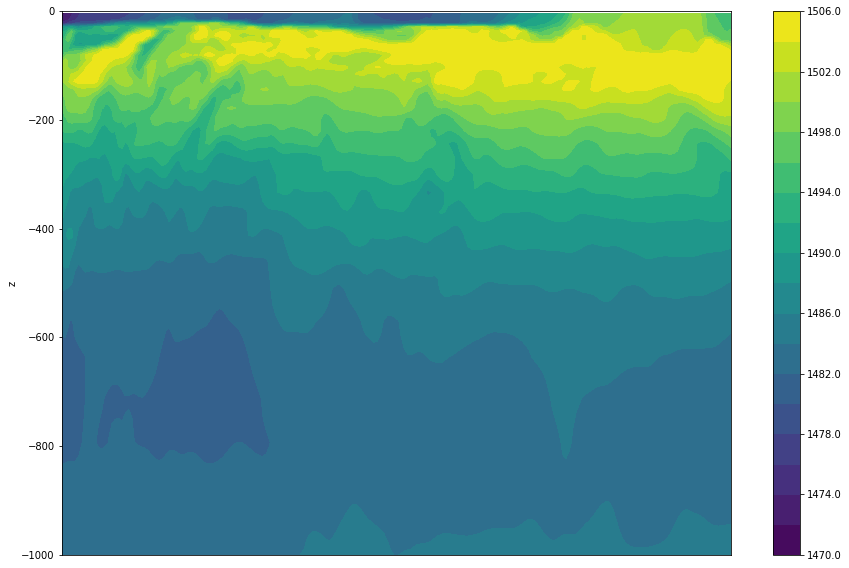

In [22]:
plt.figure(figsize=(15,10))
ax=plt.subplot(111)

toplt = c_uni.copy()
toplt[np.where(toplt>vmax)]=vmax
toplt[np.where(toplt<vmin)]=vmin
im = ax.contourf(lon,z_uni,toplt, lvls, cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xticks(())
ax.set_ylabel('z')
#ax.set_title('sound speed [m/s]')
#ax.grid(True)
ax.set_ylim([-1000.,0.])

Text(0.5,0,'[m/s]')

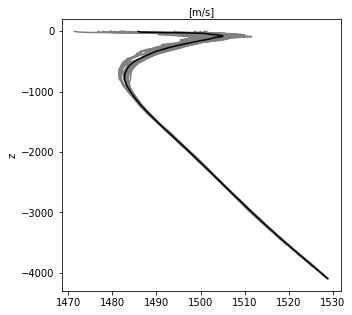

In [23]:
# show the anomaly with respect to the horizontally averaged profile
c_uni_mean = np.nanmean(c_uni,axis=1,keepdims=True)

plt.figure(figsize=(5,5))
ax=plt.subplot(111)
ax.plot(c_uni[:,::10],z_uni,'0.5')
ax.plot(c_uni_mean,z_uni,'k')
ax.set_ylabel('z')
#ax.set_title('sound speed, mean [m/s]')
#ax.set_xlabel('mean sound speed [m/s]')
#ax.grid(True)
ax.xaxis.set_label_position('top') 
ax.set_xlabel('[m/s]')
#plt.savefig('figs/C_latz.png',dpi=300)

---

## vertical slices: ilon=0

(-1000.0, 0.0)

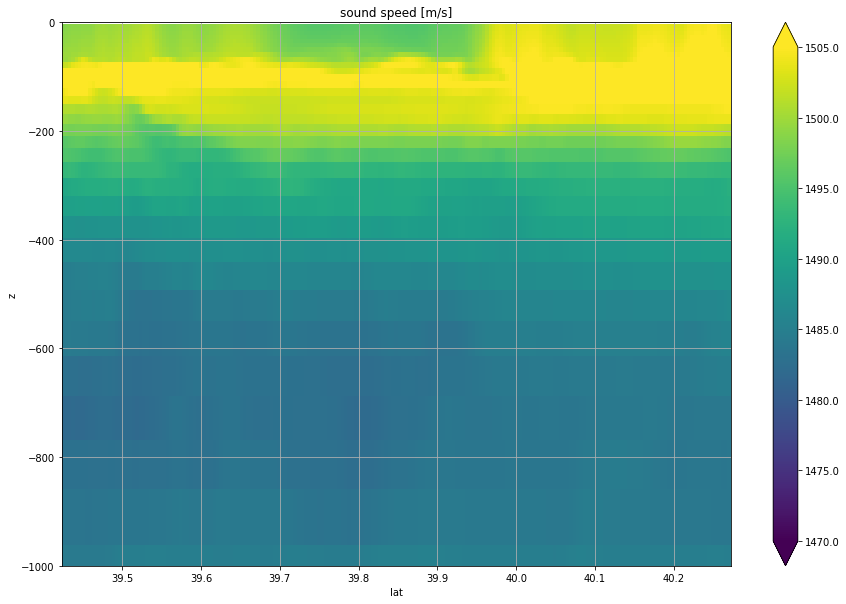

In [28]:
ilon=-1
lon = zgrd['lon_rho'].isel(xi_rho=ilon)
lat = zgrd['lat_rho'].isel(xi_rho=ilon)
h = zgrd['h'].isel(xi_rho=ilon)
zeta = zds['zeta'].isel(xi_rho=ilon)
z = grd.get_z(zeta, h)

# interpolate on now a horizontally uniform grid
ilat=0
z_uni = z.isel(eta_rho=ilat).values
T_uni = interp2z(z_uni, z.values, T.isel(xi_rho=ilon).values)[:,:,0]
S_uni = interp2z(z_uni, z.values, S.isel(xi_rho=ilon).values)[:,:,0]
c_uni = get_soundc(T_uni, S_uni, z_uni[:,None], lon.values, lat.values)

plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = c_uni
im = ax.pcolormesh(lat,z_uni,toplt, cmap=cmap, vmin=vmin, vmax=vmax)
#im = ax.contourf(lat,z_uni,toplt, 20, cmap=cmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('sound speed [m/s]')
ax.grid(True)
ax.set_ylim([-1000.,0.])

/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


(-1000.0, 0.0)

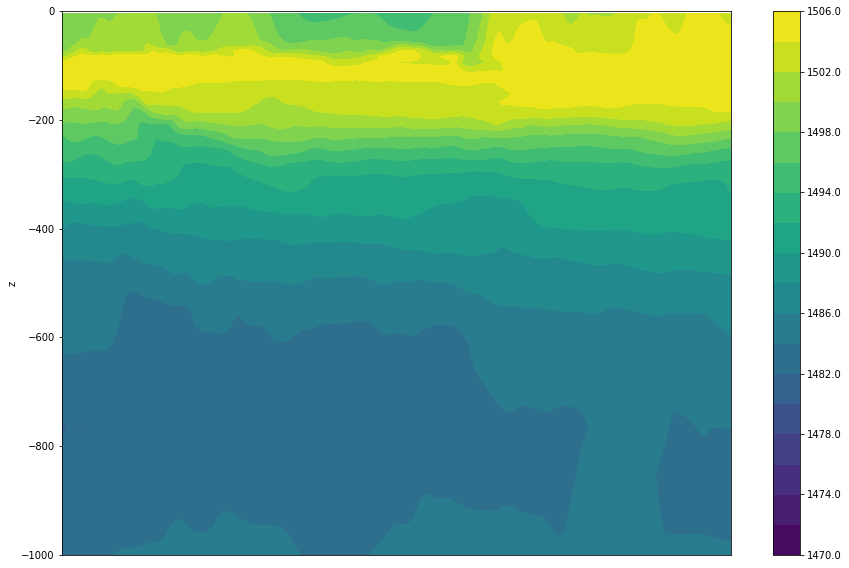

In [29]:
plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = c_uni.copy()
toplt[np.where(toplt>vmax)]=vmax
toplt[np.where(toplt<vmin)]=vmin
im = ax.contourf(lat,z_uni,toplt, lvls,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xticks(())
ax.set_ylabel('z')
#ax.set_title('sound speed [m/s]')
#ax.grid(True)
ax.set_ylim([-1000.,0.])